In [ ]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 73.2 MB/s eta 0:00:00


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import reshape_as_image

In [ ]:
# Leitura dos arquivos
src1 = rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')

img = reshape_as_image(src1.read())

In [ ]:
# Definindo função para o CO2flux
def co2flux(arr):

  # Cálculo do NDVI
  ndvi = ( arr[:,:,3] - arr[:,:,2] )  /  ( arr[:,:,3] + arr[:,:,2] )

  # Cálculo do PRI
  pri = ( arr[:,:,0] - arr[:,:,1] )  /  ( arr[:,:,0] + arr[:,:,1] )

  # Cálculo do sPri
  spri = (pri + 1) / 2

  # Cálculo do CO2flux
  CO2flux = (ndvi * spri)

  return CO2flux

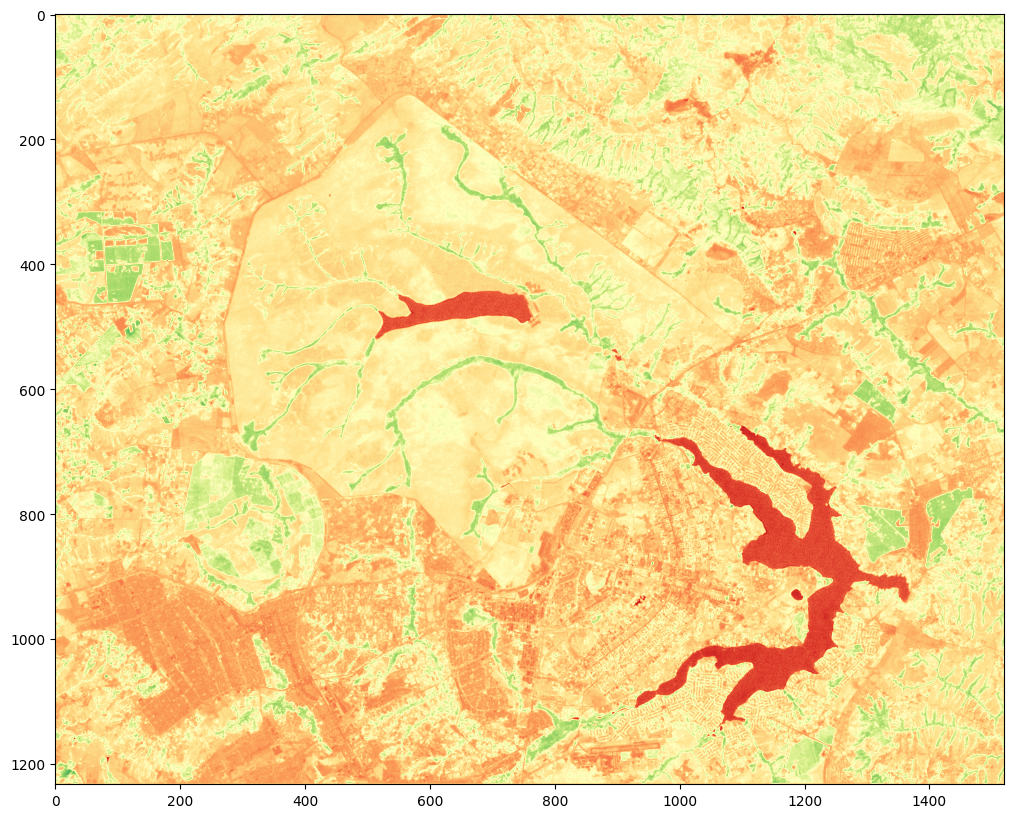

In [ ]:
# Rodando função
co2 = co2flux(img)

# Visualizando resultado
plt.imshow(co2, cmap='RdYlGn')